In [1]:
from mis import Mis
import numpy as np

In [3]:
# Instancio la clase Mis

mis = Mis()

In [27]:
# Opcion 1: Crear una matriz de incidencia aleatoria

cantidad_vertices = 4

matrix = mis.random_incidence_matrix(cantidad_vertices)

print(matrix)

[[1 1 1 0]
 [1 1 1 0]
 [0 1 0 1]
 [1 1 1 1]]


In [18]:
# Opcion 2: Crear una matriz de incidencia propia y setearla

my_matrix = np.array(
    [[0, 1, 0, 1], 
    [1, 0, 1, 0],
    [0, 1, 1, 0], 
    [1, 1, 1, 0]]
)

print(my_matrix)

mis.set_incidence_matrix(my_matrix)

[[0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 1 0]]


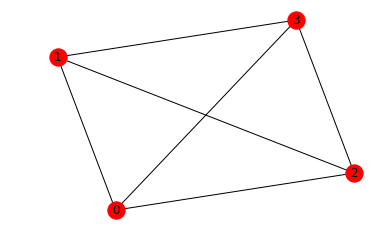

Maximum independent set = {3}


In [28]:
# Graficar el grafo y calcular el mis

mis.plot_graph()

print('Maximum independent set =', mis.maximum_independent_set())